In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv
import vtk
import pyvista as pv
import omf
import omfvista


In [6]:
wellLoc = pd.read_csv('wellLithoSeoul_0625.txt', header=0, index_col=0, usecols=[0, 1, 2, 3, 4], engine='python')
wellLoc.head()


,dep_from,dep_to,litho,litho_Code
Bore,,,,
5001001,0.0,5.0,Weathered Rock,3
5001002,0.0,1.2,Weathered Soil,2
5001002,1.2,4.5,Weathered Rock,3
5001002,4.5,7.0,Soft Rock,4
5001003,0.0,4.0,Weathered Soil,2


In [7]:
wellLoc = pd.read_csv('wellLocSeoul_0625.txt',skipfooter=1, header=0, index_col=0, usecols=[0,1,2,3, 4, 5], engine='python')
wellLoc.head()

,b_x,b_y,b_z,Dem_elev
Bore,,,,
5001001,202508.166948,445914.007345,98.30,30
5001002,202550.141173,445922.035045,99.00,31
5001003,202514.025196,445961.097219,96.00,31
5001004,210131.229153,445708.363176,106.30,18
5001005,210147.206086,445742.430977,101.59,18


In [8]:
wellLito = pd.read_csv('wellLithoSeoul_0625.txt',skipfooter=0,
                       header=0,usecols=[0,1,2,3, 4, 5, 6],engine='python')
wellLito["topLitoElev_m"] = ''
wellLito["botLitoElev_m"] = ''
wellLito.head() 

,Bore,dep_from,dep_to,litho,litho_Code,Var6,topLitoElev_m,botLitoElev_m
0,5001001,0.0,5.0,Weathered Rock,3,Landfill,,
1,5001002,0.0,1.2,Weathered Soil,2,Sediments,,
2,5001002,1.2,4.5,Weathered Rock,3,Weathered Soil,,
3,5001002,4.5,7.0,Soft Rock,4,Weathered Rock,,
4,5001003,0.0,4.0,Weathered Soil,2,Soft Rock,,


In [9]:
import time
from tqdm import notebook
import time

for index, values in wellLito.iterrows():
    x, y, z =wellLoc.loc[values.Bore][['b_x','b_y','Dem_elev']]
    topLito = z - values.dep_from 
    botLito = z- values.dep_to 
    wellLito.loc[index,"topLitoElev_m"]=topLito
    wellLito.loc[index,"botLitoElev_m"]=botLito
wellLito.set_index(index, inplace=True)
wellLito.head()

KeyError: 'None of [106816] are in the columns'

In [10]:


wellLito.to_csv('../pyvista/wellLithoSeoul_0812_real.txt')
wellLito.head()

,Bore,dep_from,dep_to,litho,litho_Code,Var6,topLitoElev_m,botLitoElev_m
0,5001001,0.0,5.0,Weathered Rock,3,Landfill,30,25
1,5001002,0.0,1.2,Weathered Soil,2,Sediments,31,29.8
2,5001002,1.2,4.5,Weathered Rock,3,Weathered Soil,29.8,26.5
3,5001002,4.5,7.0,Soft Rock,4,Weathered Rock,26.5,24
4,5001003,0.0,4.0,Weathered Soil,2,Soft Rock,31,27


In [11]:
litoPoints = []

for index, values in wellLito.iterrows():
    wellX, wellY, wellZ = wellLoc.loc[values.Bore][["b_x","b_y","Dem_elev"]]
    wellXY = [wellX, wellY]
    litoPoints.append(wellXY + [values.topLitoElev_m,values.litho_Code])
    litoPoints.append(wellXY + [values.botLitoElev_m,values.litho_Code])
    
    litoLength = values.topLitoElev_m - values.botLitoElev_m
    if litoLength < 1:
        midPoint = wellXY + [values.topLitoElev_m - litoLength/2,values.litho_Code]
    else:
        npoints = int(litoLength)
        for point in range(1,npoints+1):
            disPoint = wellXY + [values.topLitoElev_m - litoLength*point/(npoints+1),values.litho_Code]
            litoPoints.append(disPoint)
litoNp=np.array(litoPoints)
np.save('../pyvista/litoNp',litoNp)
litoNp[:40]

array([[2.02508167e+05, 4.45914007e+05, 3.00000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.50000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.91666667e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.83333333e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.75000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.66666667e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.58333333e+01, 3.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 3.10000000e+01, 2.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.98000000e+01, 2.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 3.04000000e+01, 2.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.98000000e+01, 3.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.65000000e+01, 3.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.89750000e+01, 3.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.81500000e

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [3]:
litoNp = np.load('litoNp.npy')
litoNp[:10]

array([[2.02508167e+05, 4.45914007e+05, 3.00000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.50000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.91666667e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.83333333e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.75000000e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.66666667e+01, 3.00000000e+00],
       [2.02508167e+05, 4.45914007e+05, 2.58333333e+01, 3.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 3.10000000e+01, 2.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 2.98000000e+01, 2.00000000e+00],
       [2.02550141e+05, 4.45922035e+05, 3.04000000e+01, 2.00000000e+00]])

In [4]:
litoX, litoY, litoZ = litoNp[:,0], litoNp[:,1], litoNp[:,2]
litoMean = litoNp[:,:3].mean(axis=0)
litoTrans = litoNp[:,:3]-litoMean
litoTrans[:5]

#setting up scaler
scaler = preprocessing.StandardScaler().fit(litoTrans)
litoScale = scaler.transform(litoTrans)

#check scaler
print(litoScale.mean(axis=0))
print(litoScale.std(axis=0))

[1.17996873e-16 5.54758464e-15 2.38751436e-14]
[1. 1. 1.]


In [5]:
import time
from tqdm import notebook
import time

X = litoScale
Y = litoNp[:,3]
clf = MLPClassifier(activation='tanh',solver='adam',hidden_layer_sizes=(20,20,20), max_iter=2000)
clf.fit(X,Y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20, 20), max_iter=2000)

In [6]:
numberSamples = litoNp.shape[0]
expected=litoNp[:,3]
predicted = []
for i in range(numberSamples):
    predicted.append(clf.predict([litoScale[i]]))
results = confusion_matrix(expected,predicted)
print(results)

[[ 44893  30456   5798   2846   5763     47   1191]
 [ 25089 125679   7530   9726   4505     21   1486]
 [ 13823  19789  19681  19216   5045     25   1938]
 [ 10423  19409  12837  49341  19048    128   6504]
 [  8857  12002   5532  25063  27334    374  12030]
 [  1080    755    229   1972   4215   1175   4968]
 [  4854   3956   1235   7962  12690   1006  27522]]


In [7]:
xMin = 175200 #x, y 거리가 같아야 계산이 됨!
xMax = 220200
yMin = 431000
yMax = 476000
#zMax = 360
zMax = 790
zMin = -100 

In [8]:
xMin = 202000
xMax = 203000
yMin = 440100
yMax = 441100
zMax = int(wellLoc.Dem_elev.max())
zMin = int(wellLoc.Dem_elev.min())

NameError: name 'wellLoc' is not defined

In [8]:
cellH = 10
cellV = 10

In [9]:
vertexCols = np.arange(xMin,xMax+1,cellH)
vertexRows = np.arange(yMax,yMin-1,-cellH)
vertexLays = np.arange(zMax,zMin-1,-cellV)
cellCols = (vertexCols[1:]+vertexCols[:-1])/2
cellRows = (vertexRows[1:]+vertexRows[:-1])/2 
cellLays = (vertexLays[1:]+vertexLays[:-1])/2
nCols = cellCols.shape[0]
nRows = cellCols.shape[0]
nLays = cellLays.shape[0]

In [ ]:
i=0
litoMatrix=np.zeros([nLays,nRows,nCols])
for lay in range(nLays):
    for row in range(nRows):
        for col in range(nCols):
            cellXYZ = [cellCols[col],cellRows[row],cellLays[lay]]
            cellTrans = cellXYZ - litoMean
            cellNorm = scaler.transform([cellTrans])
            
            litoMatrix[lay,row,col] = clf.predict(cellNorm)
            
            #if i%30000==0:
            #    print("Processing %s cells"%i)
            #    print(cellTrans)
            #    print(cellNorm)
            #    print(litoMatrix[lay,row,col])
            i+=1
        
            
np.save('../pyvista/litoMatrix_1',litoMatrix)

litoMatrixMod = litoMatrix[:,:,::-1]
np.save('../pyvista/litoMatrixMod_1',litoMatrixMod)
        
            
            
            

In [4]:
litoMatrix = np.load('litoMatrix_1.npy')
litoMatrixMod = np.load('litoMatrixMod_1.npy')

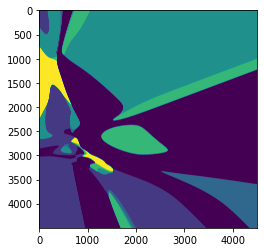

In [5]:
plt.imshow(litoMatrix[0])

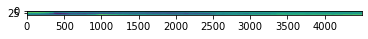

In [6]:
plt.imshow(litoMatrix[:,50])

In [13]:
np.save('../pyvista/litoMatrix',litoMatrix)

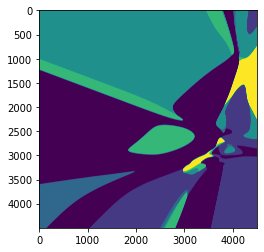

In [7]:
#matrix modification for Vtk representation
litoMatrixMod = litoMatrix[:,:,::-1]
np.save('../pyvista/litoMatrixMod',litoMatrixMod)
plt.imshow(litoMatrixMod[0])

In [8]:
import pyvista
import vtk

In [9]:
# Create empty grid
grid = pyvista.RectilinearGrid()

In [14]:
# Initialize from a vtk.vtkRectilinearGrid object
vtkgrid = vtk.vtkRectilinearGrid()
grid = pyvista.RectilinearGrid(vtkgrid)
grid = pyvista.RectilinearGrid(vertexCols,vertexRows,vertexLays)

In [15]:
litoFlat = list(litoMatrixMod.flatten(order="K"))[::-1]
grid.cell_arrays["Litho"] = np.array(litoFlat)
grid.save('../pyvista/20200824_seoul_litho_all_10by10.vtk')

In [ ]:
print(len(litoFlat))